In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

recorded_opinions_no_policy = np.load("data/nonlinear/baselines/test/n_nodes_150_average_degree_6_n_updates4/recorded_opinions_no_policy.npy", allow_pickle=True)


with open("results/dqn/opinions_during_training/GraphSage-complex-n150-k0-hd128-layers4-lr0.0001-heads0-bs64-p1-g0.8-tuf500-VPTL7/opinions.pkl", "rb") as f:
    opinions_data_single_env = pickle.load(f)


# with open("opinions/GraphSage-complex-n150-k0-hd128-layers4-lr0.0001-heads0-bs64-p4-g0.8-tuf500-5XMB0_opinions.pkl", "rb") as f:
#     opinions_data_several_env = pickle.load(f)

In [17]:
def average_pol(opinions_array):
    # Calculate polarization for each time step across all simulations
    polarization_per_step = [
        np.mean([np.linalg.norm(opinions) for opinions in opinions_array[:, step, :]])
        for step in range(opinions_array.shape[1])
    ]
    return np.array(polarization_per_step)

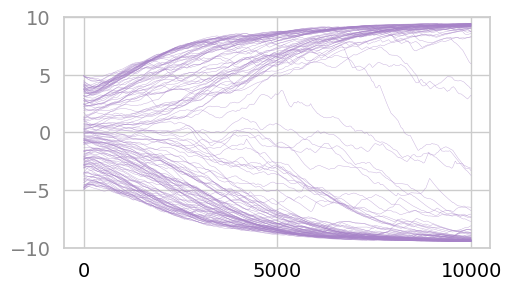

In [18]:
def plot_recorded_opinions(recorded_opinions_array):
    fig, ax1 = plt.subplots(figsize=(5.5, 3))
    time_steps = np.arange(0, len(recorded_opinions_array))
    n_nodes = recorded_opinions_array.shape[1]

    for node in range(n_nodes):
        ax1.plot(time_steps, recorded_opinions_array[:, node], alpha=0.7, color="#A783C8", linewidth=0.3)
    ax1.set_ylim(-10, 10)
    ax1.set_yticks((-10,-5, 0, 5, 10))
    ax1.set_xticks((0,5000, 10000))
    ax1.tick_params(axis='y', labelcolor='gray', labelsize=14)
    ax1.tick_params(axis='x', labelcolor='black', labelsize=14)

# ax2 = ax1.twinx()
# ax2.plot(np.arange(0, recorded_opinions.shape[1]), average_pol(recorded_opinions), alpha=0.8, linewidth=2.5, color='darkblue')
# ax2.set_ylim(0, 130)
# ax2.set_yticks((0, 25, 50, 75, 100, 125))
# ax2.tick_params(axis='y', labelcolor='darkblue', labelsize=14)

plot_recorded_opinions(recorded_opinions_no_policy[0])

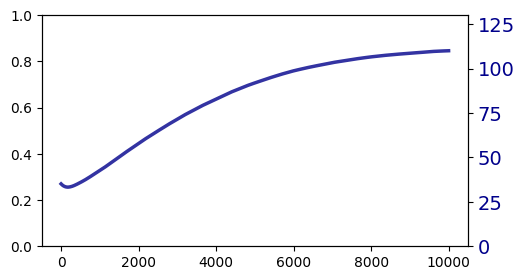

In [7]:
fig, ax1 = plt.subplots(figsize=(5.5, 3))
time_steps = np.arange(0, len(recorded_opinions_no_policy))
n_nodes = recorded_opinions_no_policy.shape[1]

# for node in range(n_nodes):
#     ax1.plot(time_steps, recorded_opinions_array[:, node], alpha=0.7, color="gray", linewidth=0.3)
# ax1.set_ylim(-10, 10)
# ax1.set_yticks((-10,-5, 0, 5, 10))
# ax1.set_xticks((0,5000, 10000))
# ax1.tick_params(axis='y', labelcolor='gray', labelsize=14)
# ax1.tick_params(axis='x', labelcolor='black', labelsize=14)

ax2 = ax1.twinx()
ax2.plot(np.arange(0, recorded_opinions_no_policy.shape[1]), average_pol(recorded_opinions_no_policy), alpha=0.8, linewidth=2.5, color='darkblue')
ax2.set_ylim(0, 130)
ax2.set_yticks((0, 25, 50, 75, 100, 125))
ax2.tick_params(axis='y', labelcolor='darkblue', labelsize=14)

In [ ]:
fig, ax1 = plt.subplots(figsize=(5.5, 3))
time_steps = np.arange(0, len(recorded_opinions_array))
n_nodes = recorded_opinions_array.shape[1]


ax2 = ax1.twinx()
ax2.plot(np.arange(0, recorded_opinions.shape[1]), average_pol(recorded_opinions), alpha=0.8, linewidth=2.5, color='darkblue')
ax2.set_ylim(0, 130)
ax2.set_yticks((0, 25, 50, 75, 100, 125))
ax2.tick_params(axis='y', labelcolor='darkblue', labelsize=14)

In [26]:
dict_policies_to_visualize = [("No Intervention", recorded_opinions_no_policy), ("DQN", opinions_data_single_env)]

dict_policies_to_visualize = {
    150: dict_policies_to_visualize,
}

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv


def visualize_polarizations(
    dict_policies_to_visualize,
    plot_file_path = "polarization_over_time.png",
    metrics_file_path = "polarization_metrics.csv",
    title="Polarization Over Time",
    step_to_report=1000
):
    sns.set_theme(style="whitegrid")

    # Define color palette but skip red
    base_palette = sns.color_palette("tab10")
    custom_palette = [c for i, c in enumerate(base_palette) if i != 3]  # skip red

    def average_pol(opinions_array):
        pol_per_step = np.array([
            [np.linalg.norm(opinions) for opinions in opinions_array[:, step, :]]
            for step in range(opinions_array.shape[1])
        ]).T
        mean_pol = np.mean(pol_per_step, axis=0)
        std_pol = np.std(pol_per_step, axis=0)
        return mean_pol, std_pol

    num_plots = len(dict_policies_to_visualize)
    fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 4), sharey=True)

    if num_plots == 1:
        axes = [axes]

    # collect results to save later
    results = []

    for ax, (key, list_policies) in zip(axes, sorted(dict_policies_to_visualize.items())):
        for color, (strat, opinions_array) in zip(custom_palette, list_policies):
            mean_pol, std_pol = average_pol(opinions_array)
            steps = np.arange(opinions_array.shape[1])

            # plot mean
            ax.plot(steps, mean_pol, label=strat, alpha=0.8, color=color)

            # shaded region ±1 std
            ax.fill_between(steps, mean_pol - std_pol, mean_pol + std_pol, alpha=0.2, color=color)

            # collect polarization at step_to_report
            if step_to_report < len(mean_pol):
                results.append({
                    "method": strat,
                    "n": key,
                    "step": step_to_report,
                    "mean": mean_pol[step_to_report],
                    "std": std_pol[step_to_report]
                })
            else:
                results.append({
                    "method": strat,
                    "n": key,
                    "step": step_to_report,
                    "mean": None,
                    "std": None
                })

        ax.set_xlabel("Time Steps")
        ax.set_title(f"{title} (n={key})")
        ax.grid(True)
        ax.legend(fontsize=10)

    axes[0].set_ylabel("Polarization")
    fig.tight_layout()
    plt.savefig(plot_file_path)
    plt.close(fig)

    # save results to file
    with open(metrics_file_path, "w", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=["method", "n", "step", "mean", "std"])
        writer.writeheader()
        for row in results:
            writer.writerow(row)


In [28]:
visualize_polarizations(
    dict_policies_to_visualize,
    "polarization_over_time.png",
    title="Polarization Over Time",#
    step_to_report=10000
)

In [27]:
def plot_recorded_opinions(recorded_opinions_array):
    single_run = recorded_opinions_array[0]
    fig, ax1 = plt.subplots(figsize=(5.5, 3))
    time_steps = np.arange(0, len(single_run))
    n_nodes = single_run.shape[1]

    for node in range(n_nodes):
        ax1.plot(time_steps, single_run[:, node], alpha=0.7, color="#A783C8", linewidth=0.3)
    ax1.set_ylim(-10, 10)
    ax1.set_yticks((-10,-5, 0, 5, 10))
    ax1.set_xticks((0,5000, 10000))
    ax1.tick_params(axis='y', labelcolor='gray', labelsize=14)
    ax1.tick_params(axis='x', labelcolor='black', labelsize=14)

    ax2 = ax1.twinx()
    ax2.plot(np.arange(0, recorded_opinions_array.shape[1]), average_pol(recorded_opinions_array), alpha=0.8, linewidth=2.5, color='darkblue')
    ax2.set_ylim(0, 130)
    ax2.set_yticks((0, 25, 50, 75, 100, 125))
    ax2.tick_params(axis='y', labelcolor='darkblue', labelsize=14)

plot_recorded_opinions(recorded_opinions_deleting)

NameError: name 'recorded_opinions_deleting' is not defined